In [2]:
# Importing necessary libraries
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import itertools

In [2]:
map_base_dir = '../../model/data/instance-segmentation'
map_img_dir = '../../model/data/instance-segmentation/train/images/'

In [3]:
json_path = os.path.join(map_base_dir, 'annotation.json')

In [4]:
# Loads the annotation data for the images from a JSON file
with open(json_path, 'r') as f:
    annot_data = json.load(f)

In [8]:
type(annot_data)

dict

In [9]:
annot_data.keys()

dict_keys(['info', 'categories', 'images', 'annotations'])

In [10]:
for i, x in enumerate(list(annot_data['images'])):
    if(i < 5):
        print(x)

{'id': 239047, 'file_name': '000000239047.jpg', 'width': 300, 'height': 300}
{'id': 37213, 'file_name': '000000037213.jpg', 'width': 300, 'height': 300}
{'id': 115886, 'file_name': '000000115886.jpg', 'width': 300, 'height': 300}
{'id': 135786, 'file_name': '000000135786.jpg', 'width': 300, 'height': 300}
{'id': 75474, 'file_name': '000000075474.jpg', 'width': 300, 'height': 300}


In [11]:
# Creates a DataFrame from the image data 
image_df = pd.DataFrame(annot_data['images'])
image_df.sample(3)

id         file_name  width  height
39060   230975  000000230975.jpg    300     300
160505    9485  000000009485.jpg    300     300
50707    78743  000000078743.jpg    300     300

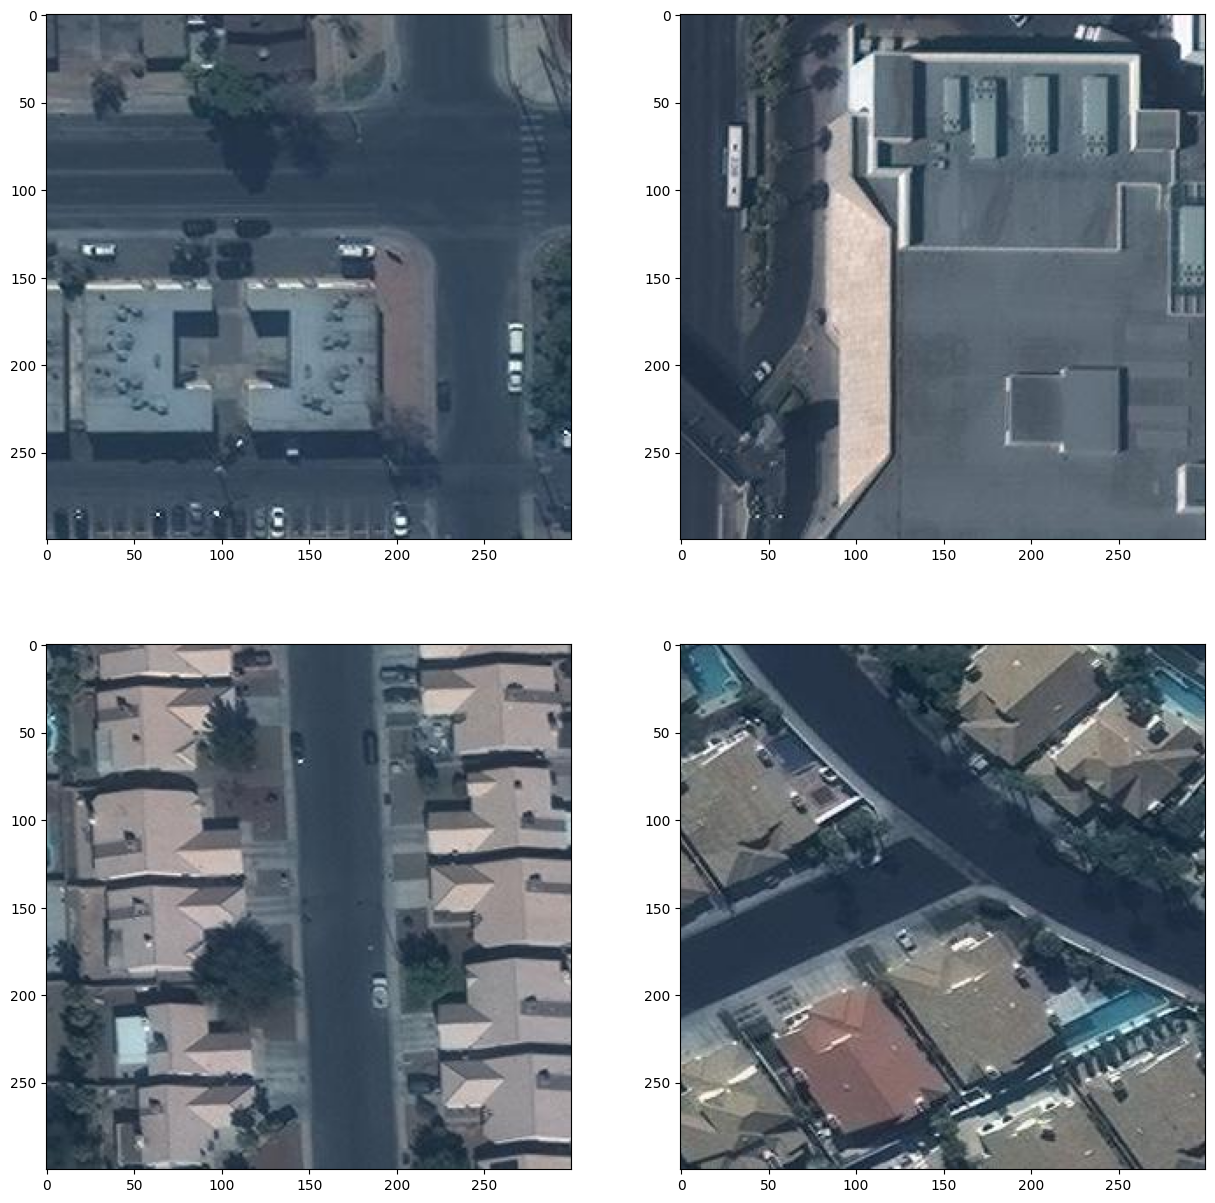

In [12]:
# Visualizes a few sample images from the dataset.
fig, m_axs = plt.subplots(2, 2, figsize = (15, 15 )) #m_axs is 2x2 array that conatains 4 axes

# Using 'm_axs.flatten() converts that 2D array into 1D array so we can iterate through all the subplots using a single loop
for c_ax, (_, c_row) in zip(m_axs.flatten(), image_df.sample(4).iterrows()):
    img_data = imread(os.path.join(map_img_dir, c_row['file_name']))
    c_ax.imshow(img_data)

In [13]:
# Creates a DataFrame from annotations data 
annot_df = pd.DataFrame(annot_data['annotations'])
annot_df.sample(3)

id  image_id                                       segmentation  \
1569653  2224626    260734  [[193.0, 137.0, 213.0, 138.0, 213.0, 153.0, 25...   
2266189  2295075    269004  [[242, 0, 234, 2, 232, 0, 242, 0, 216, 0, 198,...   
393319   1990386    233499  [[80.0, 147.0, 19.0, 144.0, 20.0, 100.00000000...   

           area                         bbox  category_id  iscrowd  
1569653  3475.0  [137.0, 190.0, 120.0, 67.0]          100        0  
2266189    72.0            [0, 194, 242, 48]          100        0  
393319   2624.0    [19.0, 19.0, 128.0, 62.0]          100        0

In [14]:
annot_df.head()

id  image_id                                       segmentation  \
0  460757     54062  [[300, 182, 297, 182, 296, 153, 300, 153, 300,...   
1  266461     31255  [[19.0, 234.0, 19.0, 245.0, 0.0, 246.0, 0.0, 2...   
2  313854     36754  [[133.0, 42.0, 133.0, 4.000000000000001, 197.0...   
3  278729     32649  [[125.0, 247.0, 125.0, 300.0, 37.0, 300.0, 36....   
4  509969     59769  [[200.0, 300.0, 212.0, 280.0, 227.0, 293.0, 23...   

     area                                     bbox  category_id  iscrowd  
0   101.0                       [182, 296, 118, 4]          100        0  
1   218.0                  [0.0, 0.0, 245.0, 19.0]          100        0  
2  2432.0  [4.000000000000001, 133.0, 193.0, 64.0]          100        0  
3  4647.0                [37.0, 36.0, 263.0, 89.0]          100        0  
4  4122.0              [200.0, 200.0, 100.0, 92.0]          100        0

In [15]:
image_df.head()

id         file_name  width  height
0  239047  000000239047.jpg    300     300
1   37213  000000037213.jpg    300     300
2  115886  000000115886.jpg    300     300
3  135786  000000135786.jpg    300     300
4   75474  000000075474.jpg    300     300

In [16]:
# Left join to combine annot_df and image_df tables togather 
# Using dropna() remove all the rows that contains NaN
full_df = pd.merge(annot_df, image_df, how='left', left_on = 'image_id', right_on='id').dropna()

In [17]:
# Exsample
print(image_df.shape[0], '+', annot_df.shape[0], '->', full_df.shape[0])

280741 + 2395553 -> 2395553


In [18]:
full_df.head()

id_x  image_id                                       segmentation  \
0  460757     54062  [[300, 182, 297, 182, 296, 153, 300, 153, 300,...   
1  266461     31255  [[19.0, 234.0, 19.0, 245.0, 0.0, 246.0, 0.0, 2...   
2  313854     36754  [[133.0, 42.0, 133.0, 4.000000000000001, 197.0...   
3  278729     32649  [[125.0, 247.0, 125.0, 300.0, 37.0, 300.0, 36....   
4  509969     59769  [[200.0, 300.0, 212.0, 280.0, 227.0, 293.0, 23...   

     area                                     bbox  category_id  iscrowd  \
0   101.0                       [182, 296, 118, 4]          100        0   
1   218.0                  [0.0, 0.0, 245.0, 19.0]          100        0   
2  2432.0  [4.000000000000001, 133.0, 193.0, 64.0]          100        0   
3  4647.0                [37.0, 36.0, 263.0, 89.0]          100        0   
4  4122.0              [200.0, 200.0, 100.0, 92.0]          100        0   

    id_y         file_name  width  height  
0  54062  000000054062.jpg    300     300  
1  31255  000000031255.jpg    300     300  
2  36754  000000036754.jpg    300     300  
3  32649  000000032649.jpg    300     300  
4  59769  000000059769.jpg    300     300

In [26]:
def create_boxes(in_rows):
    box_list = []
    for _, in_row in in_rows.iterrows():
        # bbox from the coco standard
        (start_y, start_x, wid_y, wid_x) = in_row['bbox']
        
        box_list += [Rectangle((start_x, start_y), 
                         wid_y , wid_x
                         )]
    return box_list

In [19]:
full_df.groupby('image_id')

In [173]:
# for c_ax, (c_id, c_df) in zip(m_axs.flatten(), full_df.groupby('image_id')):
#     img_data = imread(os.path.join(map_img_dir, c_df['file_name'].values[0]))
#     c_ax.imshow(img_data)
#     #c_ax.add_collection(PatchCollection(create_boxes(c_df), alpha = 0.25, facecolor = 'red'))
#     for _, c_row in c_df.iterrows():
#         xy_vec = np.array(c_row['segmentation']).reshape((-1, 2))
#         c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label = c_df['id_x'])

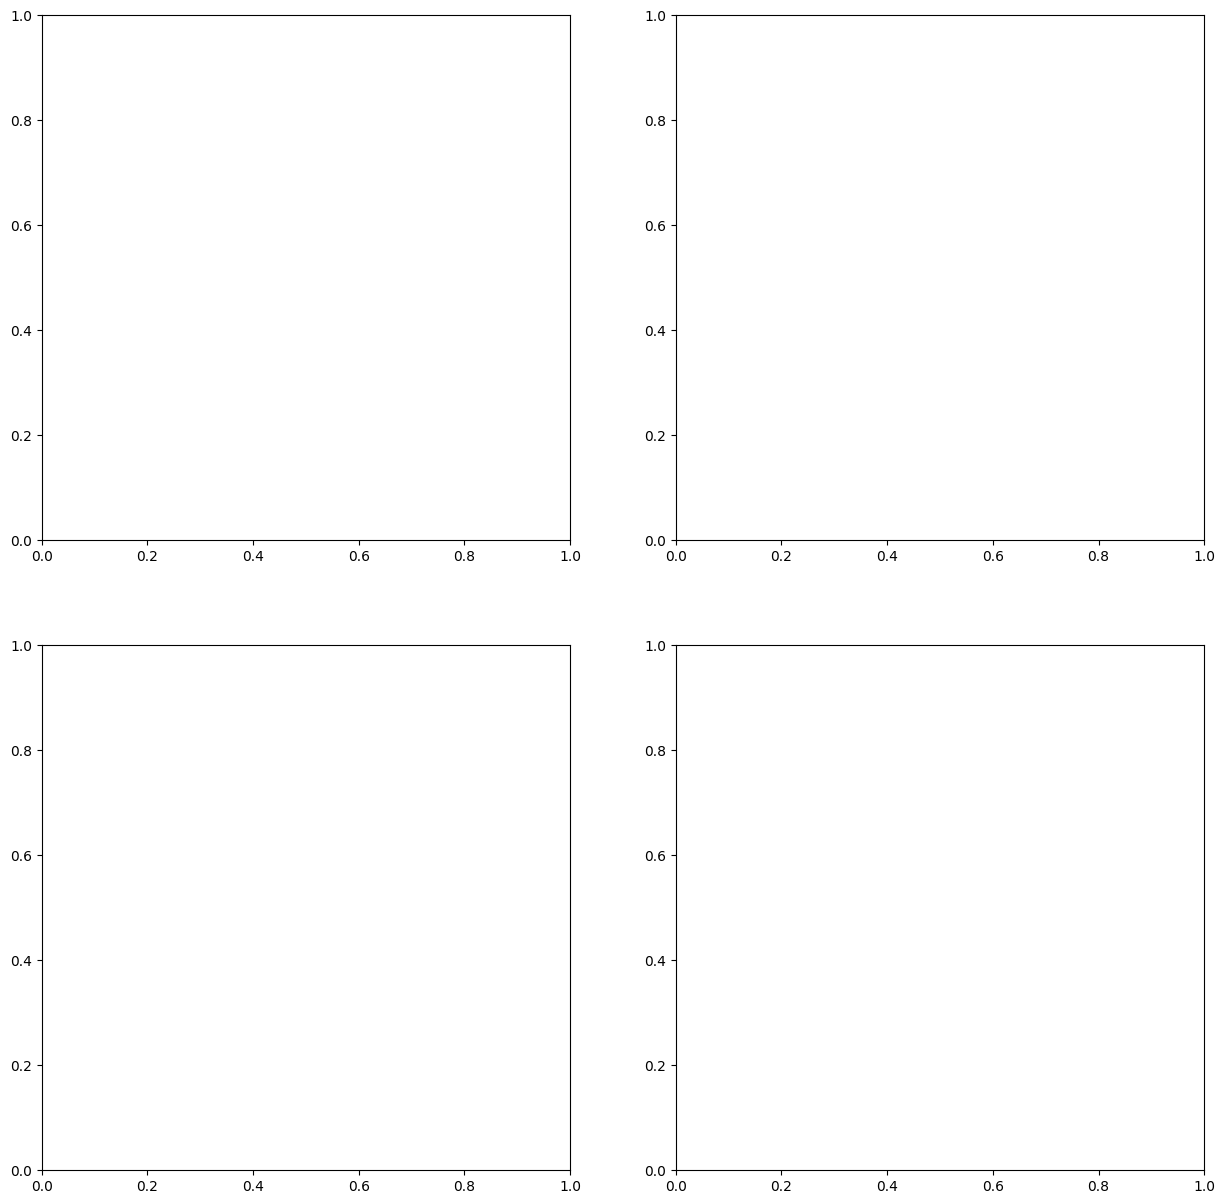

In [27]:
#Creating a 2x2 array that contains 4 axes
fig, m_axs = plt.subplots(2, 2, figsize = (15, 15)) 

In [41]:
# Group the full_dt based on image_id.
# Group by function same as groupBy in mySql 
grouped = full_df.groupby('image_id')

# for i, (key, value) in enumerate(grouped):
#         print(f"-------IMAGE ID  {key}--------")
#         x[i] = pd.DataFrame(value)

In [29]:
# x[2]

id_x  image_id                                       segmentation  \
73371      22         2  [[93.0, 287.0, 83.0, 287.0, 83.0, 300.0, 34.0,...   
166437     17         2  [[300.0, 231.0, 273.0, 232.0, 273.0, 201.0, 28...   
329608     27         2  [[182.0, 50.0, 140.0, 50.0, 140.0, 31.0, 135.0...   
334082     19         2  [[80.0, 111.0, 29.0, 114.00000000000001, 28.0,...   
392566     21         2  [[84.0, 237.0, 29.0, 238.0, 28.0, 197.0, 39.0,...   
491199     23         2  [[129.0, 300.0, 129.0, 249.0, 178.0, 250.0, 17...   
559718     24         2  [[185.0, 224.0, 167.0, 224.0, 167.0, 234.0, 13...   
581366     14         2  [[300.0, 106.99999999999999, 274.0, 106.999999...   
779595     15         2  [[271.0, 148.0, 271.0, 115.99999999999999, 300...   
876236     26         2  [[185.0, 91.0, 178.0, 91.0, 178.0, 114.0, 131....   
1104802    20         2  [[30.0, 153.0, 29.0, 125.00000000000001, 87.0,...   
1414887    18         2  [[86.0, 46.00000000000001, 40.0, 46.0000000000...   
1577641    16         2  [[300.0, 295.0, 292.0, 295.0, 292.0, 272.0, 27...   
1906860    13         2  [[300.0, 41.99999999999999, 272.0, 41.99999999...   
1960421    25         2  [[189.0, 178.0, 186.0, 178.0, 186.0, 179.0, 13...   

           area                                      bbox  category_id  \
73371    3044.0                 [26.0, 26.0, 274.0, 67.0]          100   
166437    938.0                [201.0, 273.0, 99.0, 27.0]          100   
329608   1843.0                [15.0, 135.0, 167.0, 48.0]          100   
334082   2268.0     [28.0, 28.0, 86.00000000000001, 59.0]          100   
392566   2632.0                 [28.0, 28.0, 210.0, 56.0]          100   
491199   2718.0               [129.0, 129.0, 171.0, 58.0]          100   
559718   2411.0               [128.0, 128.0, 106.0, 60.0]          100   
581366    863.0   [80.99999999999999, 274.0, 219.0, 26.0]          100   
779595   1024.0  [115.99999999999999, 271.0, 184.0, 29.0]          100   
876236   2647.0                 [91.0, 131.0, 94.0, 54.0]          100   
1104802  2719.0                 [29.0, 29.0, 124.0, 58.0]          100   
1414887  2046.0     [5.000000000000007, 40.0, 81.0, 46.0]          100   
1577641   951.0                [272.0, 274.0, 28.0, 26.0]          100   
1906860   921.0  [14.999999999999993, 272.0, 285.0, 28.0]          100   
1960421  2608.0                [124.0, 130.0, 65.0, 59.0]          100   

         iscrowd  id_y         file_name  width  height  
73371          0     2  000000000002.jpg    300     300  
166437         0     2  000000000002.jpg    300     300  
329608         0     2  000000000002.jpg    300     300  
334082         0     2  000000000002.jpg    300     300  
392566         0     2  000000000002.jpg    300     300  
491199         0     2  000000000002.jpg    300     300  
559718         0     2  000000000002.jpg    300     300  
581366         0     2  000000000002.jpg    300     300  
779595         0     2  000000000002.jpg    300     300  
876236         0     2  000000000002.jpg    300     300  
1104802        0     2  000000000002.jpg    300     300  
1414887        0     2  000000000002.jpg    300     300  
1577641        0     2  000000000002.jpg    300     300  
1906860        0     2  000000000002.jpg    300     300  
1960421        0     2  000000000002.jpg    300     300

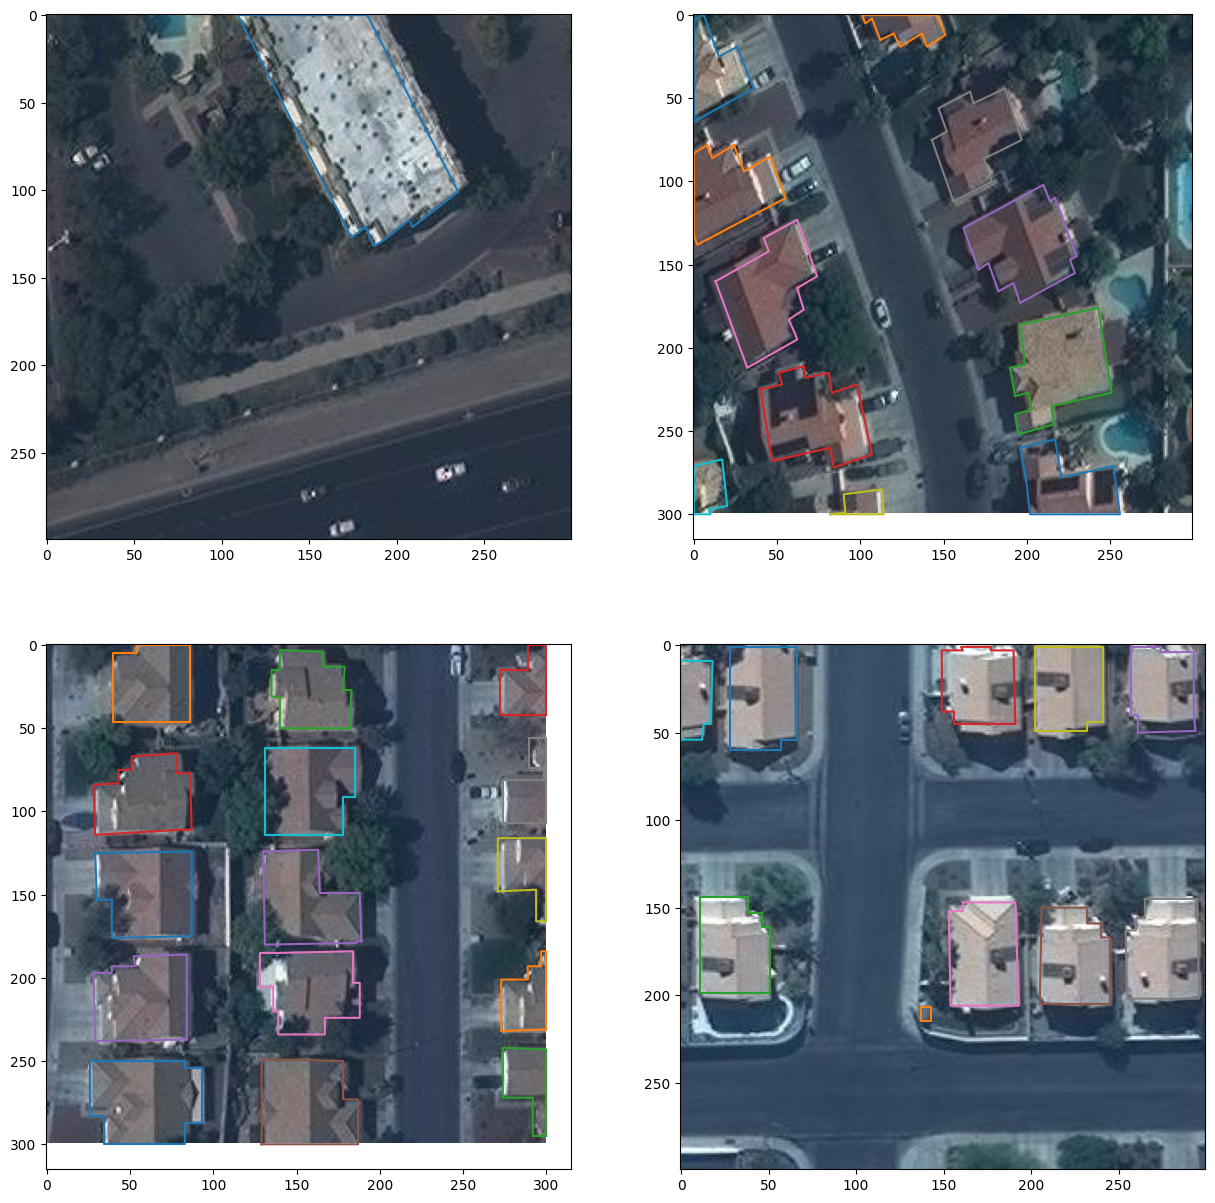

In [47]:
fig, m_axs = plt.subplots(2, 2, figsize = (15, 15))
# Outer loop will add sample image into a subplot.
for c_ax, (c_id, c_df) in zip(m_axs.flatten(), grouped): # Group by function same as groupBy in mySql 
    img_data = imread(os.path.join(map_img_dir, c_df['file_name'].values[0]))
    c_ax.imshow(img_data)
     # Inner loop : Add segmentation to the corresponding image. 
    # One image can have multiple segments cuz there can be multiple buildings in a image.
    for _, c_row in c_df.iterrows():
        xy_vec = np.array(c_row['segmentation']).reshape((-1, 2))
        c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label = c_df['id_x'])

In [90]:
from matplotlib.path import Path
from skimage.color import label2rgb
def rows_to_segmentation(in_img, in_df):
    xx, yy = np.meshgrid(range(in_img.shape[0]), 
                range(in_img.shape[1]),
               indexing='ij')
    out_img = np.zeros(in_img.shape[:2])
    for _, c_row in in_df.iterrows():
        xy_vec = np.array(c_row['segmentation']).reshape((-1, 2))
        c_ax.plot(xy_vec[:, 0], xy_vec[:, 1], label = c_df['id_x'])
        xy_path = Path(xy_vec)
        out_img += xy_path.contains_points(np.stack([yy.ravel(), 
                                                     xx.ravel()], -1)).reshape(out_img.shape)
    return out_img

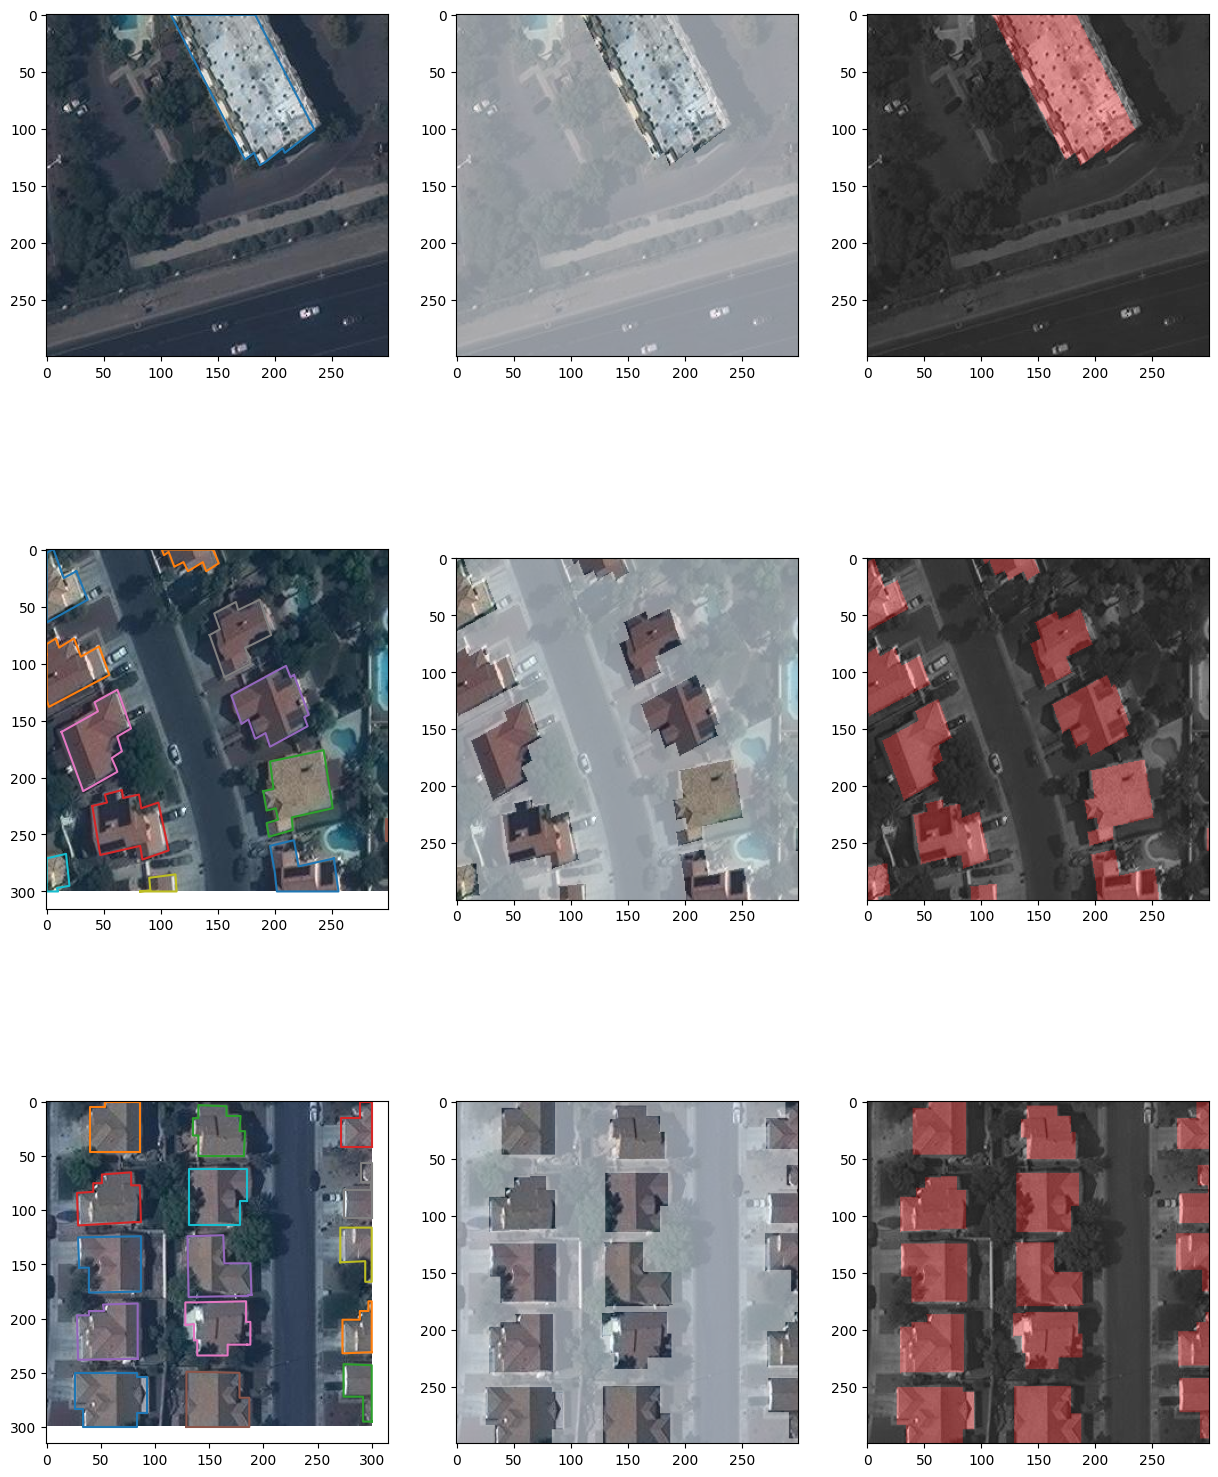

In [91]:
fig, m_axs = plt.subplots(3, 3, figsize = (15, 20))
for (c_ax, d_ax, f_ax), (c_id, c_df) in zip(m_axs,
                                      full_df.groupby('image_id')):
    img_data = imread(os.path.join(map_img_dir, c_df['file_name'].values[0]))
    c_ax.imshow(img_data)
    out_img = rows_to_segmentation(img_data, c_df)
    rgba_img = np.concatenate([img_data, 
                               np.clip(np.expand_dims(127*out_img+127, -1), 0, 255).astype(np.uint8)
                              ], -1)
    d_ax.imshow(rgba_img)
    
    f_ax.imshow(label2rgb(image=img_data, label=out_img, bg_label = 0))